In [ ]:
#Questions: 
#1. Load all the csvs in " Players2020" folder into a single data frame  
#2. Create a table with the average points per game for all the players together with the 
#number of games that the player has played 
#3. What was the highest scoring game of the season? 
#4. Create a function that given a team returns a data.frame with the number of victories, 
#loses, points per game, and opponent points per game 
#5. Create a scatterplot for each team with its points per game against its opponent points 
#per game. Label the points with the team name. 
#6. Using the data provided, recreate the table that can be found on 
#("https://www.espn.co.uk/nba/table/_/group/league") with only the 
#columns for victories, loses, points per game, and opponent points per game 
#7. Load the data in "Boxscores2020" 
#8. Enrich the players data frame created in point 1 adding a column 
#called "isHomeTeam" with a value of 1 if the player belongs to the home team and a 
#value of 0 otherwise. 
#9. Extend the table in Q4 with two columns for the Home and Away record for the team (the 
#number of victories/loses for a team when it plays at home and away respectively)

In [84]:
import pandas as pd
import os
import glob
import numpy as np

#0.5: All of these modules/libraries are imported for the purpose of allowing for data manipulation.
# pandas; for data analysis, summarising data, calculating statistics and complex operations
# os; for file and directory management, along with path manipulation.
# glob; for filename pattern matching, with it's function returning list of files and directories.
# numpy; for efficient numerical computing, mathematical functions and handling of multi-dimentional data.
    # (argueably the most important library for this project due to it's data handling and foundations).

In [85]:
folder_path = "C:\DataScience_projects\Players2020"
csv_files = glob.glob("C:\DataScience_projects\Players2020/*.csv")
dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
combined_df = pd.concat(dataframes, ignore_index=True)

#1. After following the folders path through the comand, I used the glob function to match the files.
    # As the path was reading through the files, I did .concat to combine the csv's into one,
    # creating a dataframe that is presented in the table below. 

In [86]:
combined_df

,GameId,PlayerId,Team,Name,Position,Starter,Min,Fg Made,Fg Attempted,Three Made,...,Offensive Rebound,Defensive Rebound,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Plus Minus,Points
0,401160623,3913176,NO,B. Ingram,SF,1,35,8,19,2,...,0,5,5,5,1,2,2,4,-19,22
1,401160623,4257,NO,D. Favors,C,1,21,3,6,0,...,1,6,7,2,0,1,1,5,-12,6
2,401160623,4066421,NO,L. Ball,PG,1,25,2,7,2,...,0,5,5,5,0,0,1,2,-7,8
3,401160623,3024,NO,J. Redick,SG,1,27,6,9,4,...,0,2,2,1,0,0,3,3,-14,16
4,401160623,3995,NO,J. Holiday,SG,1,41,6,15,1,...,2,2,4,6,0,2,5,2,-14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21845,401224766,4264,LAC,P. Patterson,PF,0,18,3,5,0,...,1,1,2,2,0,0,0,0,-11,8
21846,401224766,2327577,LAC,J. Green,PF,0,22,3,8,2,...,1,2,3,1,1,0,1,2,0,8
21847,401224766,2799,LAC,L. Williams,SG,0,23,5,13,2,...,1,2,3,3,2,1,2,0,-1,18
21848,401224766,2488826,LAC,R. McGruder,SG,0,16,2,3,0,...,0,4,4,1,0,0,1,3,-4,4


In [87]:
combined_df.shape

(21850, 23)

In [88]:
agg_df=combined_df.groupby('Name', as_index=False).agg(count=('Points','count'), sum=('Points','sum'))
agg_df['PointsPerGame']=(agg_df['sum']/agg_df['count']).round(1)

#2. To get this table using the 'combined_df' dataframe, I needed to .groupby to get the player from their multiple
    # mentions in the the main dataframe. With that, the count column being the amount of games they played and 
    # the sum column being amount of points they accrued throughout the 2020 season. I finally got their individual
    # points per game by dividing the sum of their points by their games played. This data then gave the table below
    # with the players name, games played and points per game.

In [89]:
agg_df

,Name,count,sum,PointsPerGame
0,A. Aminu,18,78,4.3
1,A. Baynes,42,481,11.5
2,A. Bradley,49,423,8.6
3,A. Burks,64,954,14.9
4,A. Caruso,63,349,5.5
...,...,...,...,...
508,Z. Collins,9,64,7.1
509,Z. LaVine,60,1530,25.5
510,Z. Norvell Jr.,5,10,2.0
511,Z. Smith,7,8,1.1


In [90]:
game_totals = combined_df.groupby('GameId')['Points'].sum()
highest_total_points = game_totals.max()

#3.I used the GameId and Points columns from the 'combined_df' so that I could match the total points 
    # using groupby and sum functions.This took me to the highest total points, to show the highest scoring game.
    #  I followed using the gam.totals.max() function, giving me the answer:317. I cross referenced this on: 
    # "landofbasketball.com", which showed the total of 317; 159-158, H.Rockets-W.Wizards (oct 2019).

In [91]:
highest_total_points

317

In [92]:
def team_summary(combined_df, team_name):

    team_games = combined_df[combined_df['Team'] == team_name]['GameId'].unique()
    games_df = combined_df[combined_df['GameId'].isin(team_games)]
    game_team_points = games_df.groupby(['GameId', 'Team'])['Points'].sum().reset_index()
    team_points = game_team_points[game_team_points['Team'] == team_name]
    opp_points = game_team_points[game_team_points['Team'] != team_name]

    merged = team_points.merge(
         opp_points,
        on='GameId',
        suffixes=('_team', '_opp')
    )
    merged['win'] = merged['Points_team'] > merged['Points_opp']
    wins = merged['win'].sum()
    losses = len(merged) - wins

    avg_ppg = merged['Points_team'].mean()
    avg_opp_ppg = merged['Points_opp'].mean()

    return pd.DataFrame([{
        'Team': team_name,
        'Victories': wins,
        'Losses': losses,
        'Points Per Game': round(avg_ppg, 2),
        'Opponent PPG': round(avg_opp_ppg, 2)
    }])

#4. To obtain the given function, I first defined the summary of the information that was to be shown
    # in the table result of the created function. From the 'combined_df' I needed the gameid, team
    # and points columns to calculate the numerical values placed in the function. I began by matching
    # the team names with the points, followed by separating the teams and opponents. To get the wins and 
    # losses, I merged both team and opp points, so that if team points was greater than opp points, it would 
    # count as a win. If not, then a loss. I then used the .mean function to get the average points per game.
    # Returning the data to pandas for the library to store the new data (all printed in the 'team_summary').
    # The example of the LA Clippers below showing the new working fuunction.

In [93]:
team_summary(combined_df, 'LAC')

,Team,Victories,Losses,Points Per Game,Opponent PPG
0,LAC,47,23,116.37,110.03


In [94]:
import matplotlib.pyplot as plt

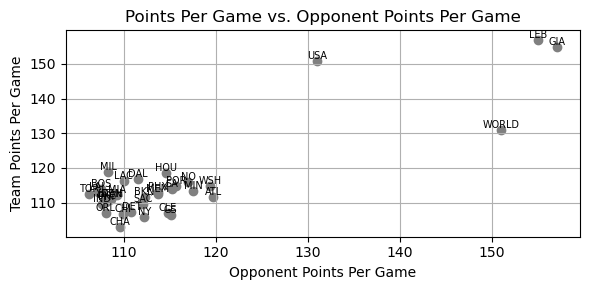

In [95]:
team_totals = combined_df.groupby(['GameId', 'Team'])['Points'].sum().reset_index()
team_totals.rename(columns={'Points': 'TeamPoints'}, inplace=True)

merged = team_totals.merge(team_totals, on='GameId')
merged = merged[merged['Team_x'] != merged['Team_y']]

merged = merged.rename(columns={
    'Team_x': 'Team',
    'TeamPoints_x': 'TeamPoints',
    'Team_y': 'Opponent',
    'TeamPoints_y': 'OpponentPoints'
})
team_stats = merged.groupby('Team').agg({
    'TeamPoints': 'mean',
    'OpponentPoints': 'mean'
}).reset_index()

plt.figure(figsize=(6, 3))
plt.scatter(team_stats['OpponentPoints'], team_stats['TeamPoints'], color='grey')

for i in range(len(team_stats)):
    plt.text(team_stats['OpponentPoints'][i], team_stats['TeamPoints'][i], team_stats['Team'][i],
             fontsize=7, ha='center', va='bottom')

plt.title('Points Per Game vs. Opponent Points Per Game')
plt.xlabel('Opponent Points Per Game')
plt.ylabel('Team Points Per Game')
plt.grid()
plt.tight_layout()
plt.show()

#5. To create a scatter plot, I needed the import of matplotlib, the library primarily used to visualise
    # data and communicating results. This library intragted with data science (the likes of pandas and 
    # numpy). I began by using .groupby for the gameid, team and points to get the information/data for the
    # teams and opponents. To match it on the graph, I merged the new named columns to the axis on the graph.
    # After getting the average points, I went on to the details of the scatter graph. The 'for i in...' 
    # syntax is for the placement for each team on the scatter graph and it's coordinates. The rest that followed
    # is the labels of the scatter graph.

In [96]:
from bs4 import BeautifulSoup
import requests

In [97]:
url = "https://www.espn.co.uk/nba/table/_/season/2020/group/league"

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

# The import of 'BeautifulSoup' is a library used to parse HTML and XML documents. This coupled with the
    # import of requests, being a module used to send requests and fetch content from web pages.
    # Both are important in web scraping (necessary for getting the table contents from ESPN).
    # As you see below, something was not right when attempting to fetch the contents for the data use.

In [98]:
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>ERROR: The request could not be satisfied</title>
</head><body>
<h1>403 ERROR</h1>
<h2>The request could not be satisfied.</h2>
<hr noshade="" size="1px"/>
Request blocked.
We can't connect to the server for this app or website at this time. There might be too much traffic or a configuration error. Try again later, or contact the app or website owner.
<br clear="all"/>
If you provide content to customers through CloudFront, you can find steps to troubleshoot and help prevent this error by reviewing the CloudFront documentation.
<br clear="all"/>
<hr noshade="" size="1px"/>
<pre>
Generated by cloudfront (CloudFront)
Request ID: hZ1zfa0Ty7ruQT4WgJlt5j1c-YFsCv9qbU_gOhIdFPyB-FUOdks6RA==
</pre>
<address>
</address>
</body></html>


In [99]:
import requests

headers = {"User-Agent": "Mozilla"} 
resp = requests.get(url, headers=headers)
data = resp.text
soup = BeautifulSoup(data, 'html')

print(soup) 

# As shown above, the use of imports was not enough to get the content from the website, so I asked AI to
    # explain what had happened. It happened due to ESPN blocking my path to the web content for python use,
    # so I asked AI to send me a code to unblock it, allowing me access. This is what is shown here.

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<!-- ESPNFITT | 45150a35da4b | 12525663 | eaed77df | www.espn.co.uk | Thu, 14 Aug 2025 10:00:14 GMT -->
<script src="https://dcf.espn.com/TWDC-DTCI/prod/Bootstrap.js"></script>
<script>
            (function(h,o,u,n,d) {
                h=h[d]=h[d]||{q:[],onReady:function(c){h.q.push(c)}}
                d=o.createElement(u);d.async=1;d.src=n
                n=o.getElementsByTagName(u)[0];n.parentNode.insertBefore(d,n)
            })(window,document,'script','https://www.datadoghq-browser-agent.com/us1/v5/datadog-rum.js','DD_RUM');
            window.DD_RUM.onReady(function() {
                window.DD_RUM.init({"clientToken":"pub5dbdf4cb0f038b6cfc70672f6791ae3b","applicationId":"d6f2e3d1-dffc-45c2-8344-c2457bb40294","site":"datadoghq.com","service":"espn-fitt","env":"prod","version":"eaed77df24fd-release-08-06-2025.2.0.2997","sessionSampleRate":0.1,"sessionReplaySampleRate":0,"trackUserInteractions":true,"trackResources"

In [100]:
soup.find('table')

<table class="Table Table--align-right Table--fixed Table--fixed-left" style="border-collapse:collapse;border-spacing:0"><colgroup class="Table__Colgroup"><col class="Table__Column"/></colgroup><thead class="Table__header-group Table__THEAD"><tr class="Table__sub-header Table__TR Table__even"><th class="tar subHeader__item--content Table__TH" title=""><span class="fw-medium w-100 dib tar subHeader__item--content"></span></th></tr></thead><tbody class="Table__TBODY"><tr class="Table__TR Table__TR--sm Table__even" data-idx="0"><td class="Table__TD"><div class="team-link flex items-center clr-gray-03"><span class="dib pl1">z --</span><span class="pr4 TeamLink__Logo"><a class="AnchorLink" data-clubhouse-uid="s:40~l:46~t:15" href="/nba/team/_/name/mil/milwaukee-bucks" tabindex="0"></a></span><span class="dn show-mobile"><a class="AnchorLink" data-clubhouse-uid="s:40~l:46~t:15" href="/nba/team/_/name/mil/milwaukee-bucks" tabindex="0"><abbr data-clubhouse-uid="s:40~l:46~t:15" style="text-deco

In [101]:
soup.find_all('table')[1]

<table class="Table Table--align-right" style="border-collapse:collapse;border-spacing:0"><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column Table--sorted"/><col class="Table__Column"/></colgroup><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/></colgroup><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/></colgroup><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/></colgroup><thead class="Table__header-group Table__THEAD"><tr class="Table__sub-header Table__TR Table__even"><th class="tar subHeader__item--content Table__TH" title=""><span class="fw-medium w-100 dib tar subHeader__item--content underline" title="Wins"><a class="AnchorLink" href="/nba/table/_/sort/wins/dir/desc/season/2020/group/league" tabindex="0">W</a></

In [102]:
soup.find('table', class_ = 'Table Table--align-right')

<table class="Table Table--align-right" style="border-collapse:collapse;border-spacing:0"><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column Table--sorted"/><col class="Table__Column"/></colgroup><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/></colgroup><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/></colgroup><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/></colgroup><thead class="Table__header-group Table__THEAD"><tr class="Table__sub-header Table__TR Table__even"><th class="tar subHeader__item--content Table__TH" title=""><span class="fw-medium w-100 dib tar subHeader__item--content underline" title="Wins"><a class="AnchorLink" href="/nba/table/_/sort/wins/dir/desc/season/2020/group/league" tabindex="0">W</a></

In [103]:
table = soup.find_all('table')[1]

In [104]:
print(table)

<table class="Table Table--align-right" style="border-collapse:collapse;border-spacing:0"><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column Table--sorted"/><col class="Table__Column"/></colgroup><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/></colgroup><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/></colgroup><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/></colgroup><thead class="Table__header-group Table__THEAD"><tr class="Table__sub-header Table__TR Table__even"><th class="tar subHeader__item--content Table__TH" title=""><span class="fw-medium w-100 dib tar subHeader__item--content underline" title="Wins"><a class="AnchorLink" href="/nba/table/_/sort/wins/dir/desc/season/2020/group/league" tabindex="0">W</a></

In [105]:
season_stats = table.find_all('th')

In [106]:
season_stats

[<th class="tar subHeader__item--content Table__TH" title=""><span class="fw-medium w-100 dib tar subHeader__item--content underline" title="Wins"><a class="AnchorLink" href="/nba/table/_/sort/wins/dir/desc/season/2020/group/league" tabindex="0">W</a></span></th>,
 <th class="tar subHeader__item--content Table__TH" title=""><span class="fw-medium w-100 dib tar subHeader__item--content underline" title="Losses"><a class="AnchorLink" href="/nba/table/_/sort/losses/dir/asc/season/2020/group/league" tabindex="0">L</a></span></th>,
 <th class="tar subHeader__item--content Table__TH" title=""><span class="fw-medium w-100 dib tar subHeader__item--content underline" title="Winning Percentage"><a class="AnchorLink" href="/nba/table/_/sort/winpercent/dir/asc/season/2020/group/league" tabindex="0">PCT<svg aria-hidden="true" class="ArrowIcon__TableSort icon__svg" style="display:inline-block;height:10px;width:10px;margin-left:4px" viewbox="0 0 24 24"><use xlink:href="#icon__caret__down"></use></svg

In [107]:
season_table_stats = [title.text for title in season_stats]

print(season_table_stats)

['W', 'L', 'PCT', 'GB', 'HOME', 'AWAY', 'DIV', 'CONF', 'PPG', 'OPP PPG', 'DIFF', 'STRK', 'L10']


In [108]:
import pandas as pd

In [109]:
df2 = pd.DataFrame(columns = season_table_stats)

df2

,W,L,PCT,GB,HOME,AWAY,DIV,CONF,PPG,OPP PPG,DIFF,STRK,L10


In [110]:
column_data = table.find_all('tr')

In [111]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    team_row_data = [data.text for data in row_data]
    #print(team_row_data)
    length = len(df2)
    df2.loc[length] = team_row_data

#6. After the previous blocks, I was able to obtain the html from the url. I then used multiple .text and 
    # .find functions to single out the 2020 table information on the website url. Once I was able to get the 
    # titles used in the table columns, I had to pin point the data used in the whole table to my new 
    # dataframe, placing it in pandas for further data summarising. The th, tr, and td represented the headers,
    # rows and data in the html markup language that was shortened with 'season_stats'. To insert the data from
    # the table under the headers, I used the .find_all function, followed by .text. The data matched the rows as 
    # len (length) was used to match the tables rows. This semi recreated the table from ESPN.

In [112]:
df2

,W,L,PCT,GB,HOME,AWAY,DIV,CONF,PPG,OPP PPG,DIFF,STRK,L10
0,56,17,.767,-,30-5,26-12,13-1,37-7,118.7,108.6,+10.1,L1,3-7
1,53,19,.736,2.5,26-10,27-9,9-5,34-11,112.8,106.5,+6.3,W4,9-1
2,52,19,.732,3,25-10,27-9,10-3,36-10,113.4,107.6,+5.8,L1,4-6
3,49,23,.681,6.5,27-9,22-14,8-6,32-16,116.3,109.9,+6.4,W2,6-4
4,48,24,.667,7.5,26-10,22-14,9-6,30-13,113.7,107.3,+6.4,L1,6-4
5,46,27,.630,10,26-11,20-16,12-2,29-16,111.3,109.2,+2.1,L3,4-6
6,45,28,.616,11,25-11,20-17,8-7,28-19,109.4,107.5,+1.9,W2,7-3
7,44,28,.611,11.5,24-12,20-16,8-5,28-19,117.8,114.8,+3.0,L3,5-5
8,44,28,.611,11.5,23-14,21-14,8-5,27-19,110.4,108.4,+2.0,L1,6-4
9,44,28,.611,11.5,23-12,21-16,5-7,24-21,111.3,108.8,+2.5,W1,4-6


In [113]:
import pandas as pd

nba_teams_names = [
    "Milwaukee Bucks",
    "Toronto Raptors",
    "Los Angeles Lakers",
    "LA Clippers",
    "Boston Celtics",
    "Denver Nuggets",
    "Indiana Pacers",
    "Houston Rockets",
    "Oklahoma City Thunder",
    "Utah Jazz",
    "Miami Heat",
    "Philadelphia 76ers",
    "Dallas Mavericks",
    "Brooklyn Nets",
    "Portland Trail Blazers",
    "Memphis Grizzlies",
    "Phoenix Suns",
    "Orlando Magic",
    "San Antonio Spurs",
    "Sacramento Kings",
    "New Orleans Pelicans",
    "Charlotte Hornets",
    "Washington Wizards",
    "Chicago Bulls",
    "New York Knicks",
    "Detroit Pistons",
    "Atlanta Hawks",
    "Minnesota Timberwolves",
    "Cleveland Cavaliers",
    "Golden State Warriors"
]

df2.index = nba_teams_names

df2

#6. Although the previous 'df2' presented all the corrent numbers, the index only provided the rank of the team
    # in the 2020 season. I later figured out that it was due to different names and images links in the original
    # ESPN website table. I was not able to extract the team name only, so I decided to manually set the names 
    # to the index column, matching the team's data in the rows.

,W,L,PCT,GB,HOME,AWAY,DIV,CONF,PPG,OPP PPG,DIFF,STRK,L10
Milwaukee Bucks,56,17,.767,-,30-5,26-12,13-1,37-7,118.7,108.6,+10.1,L1,3-7
Toronto Raptors,53,19,.736,2.5,26-10,27-9,9-5,34-11,112.8,106.5,+6.3,W4,9-1
Los Angeles Lakers,52,19,.732,3,25-10,27-9,10-3,36-10,113.4,107.6,+5.8,L1,4-6
LA Clippers,49,23,.681,6.5,27-9,22-14,8-6,32-16,116.3,109.9,+6.4,W2,6-4
Boston Celtics,48,24,.667,7.5,26-10,22-14,9-6,30-13,113.7,107.3,+6.4,L1,6-4
Denver Nuggets,46,27,.630,10,26-11,20-16,12-2,29-16,111.3,109.2,+2.1,L3,4-6
Indiana Pacers,45,28,.616,11,25-11,20-17,8-7,28-19,109.4,107.5,+1.9,W2,7-3
Houston Rockets,44,28,.611,11.5,24-12,20-16,8-5,28-19,117.8,114.8,+3.0,L3,5-5
Oklahoma City Thunder,44,28,.611,11.5,23-14,21-14,8-5,27-19,110.4,108.4,+2.0,L1,6-4
Utah Jazz,44,28,.611,11.5,23-12,21-16,5-7,24-21,111.3,108.8,+2.5,W1,4-6


In [114]:
df2 = df2[['W', 'L', 'PPG', 'OPP PPG']]
df2.columns = ["W", "L", "PPG", "OPP PPG"]

In [115]:
df2
#6. After successfully web scraping ESPN for the complete 2020 table, I specified 'df2' to only the 
    # wins, losses, ppg and opp ppg columns. This is finalised and shown below.

,W,L,PPG,OPP PPG
Milwaukee Bucks,56,17,118.7,108.6
Toronto Raptors,53,19,112.8,106.5
Los Angeles Lakers,52,19,113.4,107.6
LA Clippers,49,23,116.3,109.9
Boston Celtics,48,24,113.7,107.3
Denver Nuggets,46,27,111.3,109.2
Indiana Pacers,45,28,109.4,107.5
Houston Rockets,44,28,117.8,114.8
Oklahoma City Thunder,44,28,110.4,108.4
Utah Jazz,44,28,111.3,108.8


In [116]:
import pandas as pd
import os
import glob
import numpy as np

In [117]:
folder_path = "C:\DataScience_projects\Boxscores2020"
csv_files = glob.glob("C:\DataScience_projects\Boxscores2020/*.csv")
dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
combined_df2 = pd.concat(dataframes, ignore_index=True)

#7. Similar to the load of csv's in '1.', I repeated the same process, but with the Boxscores2020 folder.

In [151]:
combined_df2

,GameId,Date,AwayTeam,Away Ov Record,Away Record away,Away 1Q Score,Away 2Q Score,Away 3Q Score,Away 4Q Score,Away Final Score,HomeTeam,Home Ov Record,Home Record home,Home 1Q Score,Home 2Q Score,Home 3Q Score,Home 4Q Score,Home Final Score
0,401160623,20191022,NO,0-1,0-1 Away,30,31,25,31,122,TOR,1-0,1-0 Home,27,29,32,29,130
1,401160624,20191022,LAL,0-1,0-1 Away,25,29,31,17,102,LAC,1-0,1-0 Home,22,40,23,27,112
2,401160625,20191023,CHI,0-1,0-1 Away,28,27,40,30,125,CHA,1-0,1-0 Home,37,26,33,30,126
3,401160626,20191023,DET,1-0,1-0 Away,27,27,29,36,119,IND,0-1,0-1 Home,24,31,31,24,110
4,401160627,20191023,CLE,0-1,0-1 Away,24,17,24,20,85,ORL,1-0,1-0 Home,28,27,16,23,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,401224762,20200809,SA,31-38,13-23 Away,27,35,19,41,122,NO,30-40,15-21 Home,19,26,32,36,113
1030,401224763,20200809,ORL,32-39,15-23 Away,29,22,35,26,119,BOS,47-23,26-9 Home,28,27,32,25,122
1031,401224764,20200809,PHI,42-28,11-26 Away,19,39,34,29,121,POR,33-39,21-15 Home,33,34,24,33,124
1032,401224765,20200809,HOU,44-25,20-15 Away,23,38,32,36,129,SAC,29-41,15-19 Home,36,20,15,41,112


In [148]:
#fileName = 'Cplayers2020.xlsx'
#combined_df.to_excel('Cplayers2020.xlsx', index=True)

In [149]:
home_teams = combined_df.groupby("GameId")["Team"].last()

combined_df["isHomeTeam"] = (
    combined_df["Team"] == combined_df["GameId"].map(home_teams)
).astype(int)

#8. The first thing I did was ensure the dataframe knew what was the home team. I did this by .groupby gameid 
    # and team. The .last() assumes the last team listed per GameId is home. (This is due to the team on the right
    # of the nba matchup display (second team listed) is the home team, with the team on the left (first team 
    # listed) being the away team). I then added the new column to the 'combined_df' with the .astype function,
    # adding the integer (1) to the team that was indeed home. I downloaded the dataframe to excel to check 
    # and confirm as the dataframe is large and difficult to see all content.

In [144]:
#verified 'isHomeTeam' by searching nba game id to match up whether team is home.

In [150]:
combined_df

,GameId,PlayerId,Team,Name,Position,Starter,Min,Fg Made,Fg Attempted,Three Made,...,Defensive Rebound,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Plus Minus,Points,isHomeTeam
0,401160623,3913176,NO,B. Ingram,SF,1,35,8,19,2,...,5,5,5,1,2,2,4,-19,22,0
1,401160623,4257,NO,D. Favors,C,1,21,3,6,0,...,6,7,2,0,1,1,5,-12,6,0
2,401160623,4066421,NO,L. Ball,PG,1,25,2,7,2,...,5,5,5,0,0,1,2,-7,8,0
3,401160623,3024,NO,J. Redick,SG,1,27,6,9,4,...,2,2,1,0,0,3,3,-14,16,0
4,401160623,3995,NO,J. Holiday,SG,1,41,6,15,1,...,2,4,6,0,2,5,2,-14,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21845,401224766,4264,LAC,P. Patterson,PF,0,18,3,5,0,...,1,2,2,0,0,0,0,-11,8,1
21846,401224766,2327577,LAC,J. Green,PF,0,22,3,8,2,...,2,3,1,1,0,1,2,0,8,1
21847,401224766,2799,LAC,L. Williams,SG,0,23,5,13,2,...,2,3,3,2,1,2,0,-1,18,1
21848,401224766,2488826,LAC,R. McGruder,SG,0,16,2,3,0,...,4,4,1,0,0,1,3,-4,4,1


In [152]:
fileName2 = 'Cbox2020.xlsx'
combined_df2.to_excel('Cbox2020.xlsx', index=True)

In [156]:
combined_df2["home_win"] = combined_df2["Home Final Score"] > combined_df2["Away Final Score"]

HomeRecord = combined_df2.groupby("HomeTeam").agg(
    home_wins=("home_win", "sum"),
    home_losses=("home_win", lambda x: (~x).sum())
)
HomeRecord["HomeRecord"] = HomeRecord["home_wins"].astype(str) + "-" + HomeRecord["home_losses"].astype(str)

AwayRecord = combined_df2.groupby("AwayTeam").agg(
    away_wins=("home_win", lambda x: (~x).sum()),  
    away_losses=("home_win", "sum")               
)
AwayRecord["AwayRecord"] = AwayRecord["away_wins"].astype(str) + "-" + AwayRecord["away_losses"].astype(str)

HomeRecord = HomeRecord[["HomeRecord"]]
AwayRecord = AwayRecord[["AwayRecord"]]

records_df = HomeRecord.merge(AwayRecord, left_index=True, right_index=True)

# Merge with your Q4 dataframe (assuming Q4_df exists and has team names as
#9. I began by indentifying the records of the individual teams being home and away through the final scores.
    # I done this by .groupby home/away team and .agg on the home win, with .sum to see which team won, 
    # home or away. I then did .astype to present H-A record in one column for the home and awa team.
    # To create one dataframe with these separate records, I used .merge to create one table.

In [157]:
records_df

,HomeRecord,AwayRecord
ATL,14-20,6-27
BKN,20-15,14-21
BOS,26-9,21-14
CHA,10-21,13-21
CHI,14-20,8-23
CLE,11-25,8-21
DAL,20-17,22-13
DEN,26-10,20-14
DET,11-22,9-24
GS,8-26,7-24


In [160]:
def team_summary2(combined_df, team_name):

    team_games = combined_df[combined_df['Team'] == team_name]['GameId'].unique()
    games_df = combined_df[combined_df['GameId'].isin(team_games)]

    game_team_points = games_df.groupby(['GameId', 'Team'])['Points'].sum().reset_index()
    team_points = game_team_points[game_team_points['Team'] == team_name]
    opp_points = game_team_points[game_team_points['Team'] != team_name]

    merged = team_points.merge(
        opp_points,
        on='GameId',
        suffixes=('_team', '_opp')
    )
    merged['win'] = merged['Points_team'] > merged['Points_opp']

    wins = merged['win'].sum()
    losses = len(merged) - wins

    avg_ppg = merged['Points_team'].mean()
    avg_opp_ppg = merged['Points_opp'].mean()

    team_home_games = combined_df[(combined_df['Team'] == team_name) & (combined_df['isHomeTeam'] == 1)]['GameId'].unique()
    team_away_games = combined_df[(combined_df['Team'] == team_name) & (combined_df['isHomeTeam'] == 0)]['GameId'].unique()

    home_wins = merged[merged['GameId'].isin(team_home_games) & merged['win']].shape[0]
    home_losses = merged[merged['GameId'].isin(team_home_games) & ~merged['win']].shape[0]
    away_wins = merged[merged['GameId'].isin(team_away_games) & merged['win']].shape[0]
    away_losses = merged[merged['GameId'].isin(team_away_games) & ~merged['win']].shape[0]

    return pd.DataFrame([{
        'Team': team_name,
        'Victories': wins,
        'Losses': losses,
        'Points Per Game': round(avg_ppg, 2),
        'Opponent PPG': round(avg_opp_ppg, 2),
        'Home Record': f"{home_wins}-{home_losses}",
        'Away Record': f"{away_wins}-{away_losses}"
    }])
#9.5: As I was not entirely sure what '9.' was asking, I followed by also creating a H-A record for '4.'
    # team_summary. After filtering for the teams and ppg, I followed the same principles for '4.', 
    # adding home and away wins/losses to be merged with the GameId and wins. This determined the winning team 
    # and else if they did not win (a point to the loss side). I then added the home and away records to the return 
    # pandas dataframe, adding the two columns to the newly created function. The two teams below 
    # (Lakers and Clippers) are the example of the new function 'team_summary2' with the record columns.

In [162]:
team_summary2(combined_df, "LAL")

,Team,Victories,Losses,Points Per Game,Opponent PPG,Home Record,Away Record
0,LAL,50,19,113.16,107.22,24-9,26-10


In [163]:
team_summary2(combined_df, "LAC")

,Team,Victories,Losses,Points Per Game,Opponent PPG,Home Record,Away Record
0,LAC,47,23,116.37,110.03,26-9,21-14


In [ ]:
Junior RF Frazao